In [30]:
# Импортируем необходимые библиотеки для анализа данных

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Настройка отображения графиков

sns.set(
    font_scale=2,
    style="darkgrid",
    rc={'figure.figsize':(10,10)}
        )

In [32]:
plt.style.use("dark_background") # применим темную тему для графиков

***
## Задание 1

**Найти все аномалии в фрейме продукта «Стратегия» (test_frame_V1.Json) и ответить на вопросы:**

1. Какие из этих аномалий вы передадите в отдел безопасности, юридический отдел, разработчику продукта, отдел маркетинга (с каждой аномалией можно обратиться только в один отдел)

2. Дать объяснение почему принято такое решение
***

In [33]:
df = pd.read_json('C:/Users/alyap/Finam/test_frame_V1.json') # Создаем DataFrame из файла json

In [34]:
df.head() # Отобразим первые 5 строк датафрейма и убедимся, что файл правильно считан

,Клиент,Дата рождения,Брокерский счет,Услуга,Начало,Окончание
0,User_0,2-3-1989,Broker_account_0,Strategy_0,2020-06-17T12:28:00.000Z,None
1,User_1,15-7-1981,Broker_account_1,Strategy_0,2020-11-27T16:39:12.000Z,2021-02-02T15:11:57.000Z
2,User_10,14-8-1988,Broker_account_10,Strategy_2,2020-12-09T11:59:27.000Z,None
3,User_10,14-8-1988,Broker_account_14023,Strategy_238,2020-09-24T12:54:06.000Z,2021-02-04T16:49:55.000Z
4,User_10,14-8-1988,Broker_account_14024,Strategy_236,2020-11-10T15:52:13.000Z,None


In [35]:
df.shape # Размер датафрейма

(17271, 6)

In [36]:
# Типы данных в датафрейме

df.dtypes

Клиент             object
Дата рождения      object
Брокерский счет    object
Услуга             object
Начало             object
Окончание          object
dtype: object

In [37]:
# Проверим датафрейм на дубли

df[df.duplicated() == True]

,Клиент,Дата рождения,Брокерский счет,Услуга,Начало,Окончание
5032,User_2111,14-3-1986,Broker_account_2354,Strategy_22,2020-05-04T14:30:15.000Z,2020-05-04T14:31:15.000Z


В датафрейме имеется одна дублирующая строка. Избавимся от нее

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.shape

(17270, 6)

In [40]:
df.isna().sum() # Пропущенные значения

Клиент                 0
Дата рождения          0
Брокерский счет        0
Услуга                 0
Начало                 0
Окончание          12443
dtype: int64

In [41]:
df['Окончание'].isna().mean()

0.7204979733642154

В датафрейме необходимо перевести временные данные: дни рождения в date, начала и окончания услуги в datetime,   
при этом 72 % данных об окончании услуги отсутствуют.

In [42]:
# Изменим тип данных в столбце день рождения

df['Дата рождения'] = pd.to_datetime(df['Дата рождения'], format='%d-%m-%Y')

In [43]:
df['Дата рождения'].head()

0   1989-03-02
1   1981-07-15
2   1988-08-14
3   1988-08-14
4   1988-08-14
Name: Дата рождения, dtype: datetime64[ns]

Изменим тип данных в столбцах Начало и Окончание   
Для этого необходимо перевести даты из формата ISO в формат datetime   
Возпользуемся библиотекой dateutil

In [44]:
from dateutil.parser import parse

In [45]:
df['Начало_new'] = df['Начало'].apply(parse) # сщздадим новый столбец

In [46]:
df['Начало_new'].head()

0   2020-06-17 12:28:00+00:00
1   2020-11-27 16:39:12+00:00
2   2020-12-09 11:59:27+00:00
3   2020-09-24 12:54:06+00:00
4   2020-11-10 15:52:13+00:00
Name: Начало_new, dtype: datetime64[ns, tzutc()]

In [47]:
from datetime import datetime

In [48]:
df['Начало_new'].head()

0   2020-06-17 12:28:00+00:00
1   2020-11-27 16:39:12+00:00
2   2020-12-09 11:59:27+00:00
3   2020-09-24 12:54:06+00:00
4   2020-11-10 15:52:13+00:00
Name: Начало_new, dtype: datetime64[ns, tzutc()]

In [49]:
df['Начало_new'] = pd.to_datetime(df['Начало_new'], format="%Y-%m-%d") # Осталось перевести в формат datetime64

In [50]:
df['Начало_new'].head()

0   2020-06-17 12:28:00+00:00
1   2020-11-27 16:39:12+00:00
2   2020-12-09 11:59:27+00:00
3   2020-09-24 12:54:06+00:00
4   2020-11-10 15:52:13+00:00
Name: Начало_new, dtype: datetime64[ns, tzutc()]

In [51]:
df['Окончание_new'] = df[df['Окончание'].isna() == False]['Окончание'].apply(parse)

In [52]:
df['Окончание_new'].head()

0                         NaT
1   2021-02-02 15:11:57+00:00
2                         NaT
3   2021-02-04 16:49:55+00:00
4                         NaT
Name: Окончание_new, dtype: datetime64[ns, tzutc()]

In [53]:
df['Окончание_new'] = pd.to_datetime(df['Окончание_new'], format="%Y-%m-%d")

In [54]:
df['Окончание_new'].head()

0                         NaT
1   2021-02-02 15:11:57+00:00
2                         NaT
3   2021-02-04 16:49:55+00:00
4                         NaT
Name: Окончание_new, dtype: datetime64[ns, tzutc()]

Добавим столбцы с датами начала и окончания стратегий и разницу между этими датами

In [55]:
df['Дата_начала'] = df['Начало_new'].dt.date

In [56]:
df['Дата_окончания'] = df['Окончание_new'].dt.date

In [57]:
df['Дельта_времени'] = df['Дата_окончания'] - df['Дата_начала']

Проверим есть ли отрицательная разница во времени окончания и начала услуги, не учитывая пропуски

In [58]:
df_timedelta = df[df['Дельта_времени'] < '0 days']
df_timedelta

,Клиент,Дата рождения,Брокерский счет,Услуга,Начало,Окончание,Начало_new,Окончание_new,Дата_начала,Дата_окончания,Дельта_времени


Помним, что в в датафрейме отсутствуют 72% данных о дате завершения услуги.   
Это говорит о следующем:   
 1. Пользователи не прекратили пользоваться услугой на дату выгрузки данных.
 2. Возникает вопрос о дате выгрузке таких данных, т.к. с февраля 2021 у нас нет информации о клиентах и времни оказания услуг.    
 3. Необходимо определить следующее: дату, которой будем заполнять пропуски и от которой будем рассчитывать дальнейшие показатели.


Рассмотрим распределение времени пользования стратегиями по имеющимся данным.

<AxesSubplot:>

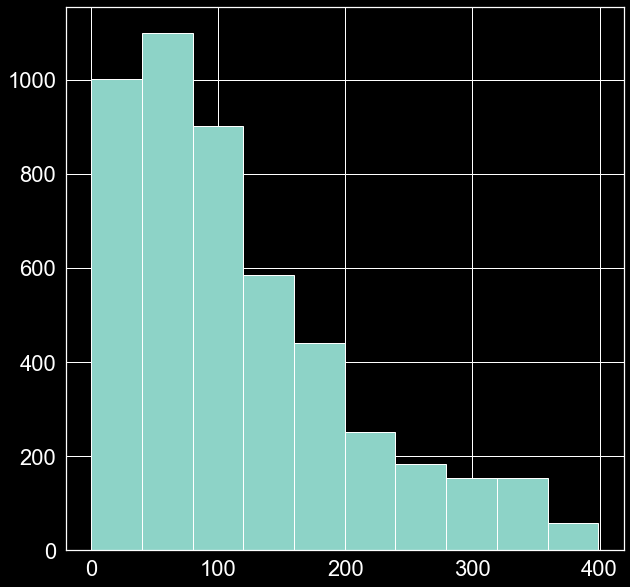

In [59]:
df[df['Окончание_new'].isna() == False]['Дельта_времени'].dt.days.hist()

In [60]:
df[df['Окончание_new'].isna() == False]['Дельта_времени'].dt.days.describe()

count    4827.000000
mean      113.942614
std        90.428917
min         0.000000
25%        48.000000
50%        92.000000
75%       161.000000
max       399.000000
Name: Дельта_времени, dtype: float64

Медианное время пользования стратегией - 3 месяца.

Посмотрим какая максимальная дата в датафрейме

In [61]:
df['Дата_начала'].max()

datetime.date(2020, 12, 14)

In [62]:
df[df['Дата_окончания'].isna() == False]['Дата_окончания'].max()

datetime.date(2021, 2, 16)

In [63]:
from datetime import timedelta

Исходя из значительного временного разрыва между рассматриваемым датафреймом и датами транзакций, а таже учитывая отсутствие данных за 2022 и 2023 год,   
примем за дату расчета (дату выгрузки) максимальную дату в датафрейме плюс 3 месяца и дальнейшие расчеты будем проводить от этой даты. 

In [64]:
max_date = df[df['Дата_окончания'].isna() == False]['Дата_окончания'].max() + timedelta(days=90)
max_date

datetime.date(2021, 5, 17)

In [65]:
df_filter = df.copy()

Заменим датой max_date пропуски.

In [66]:
df_filter['Дата_окончания'] = df_filter['Дата_окончания'].fillna(max_date)

Рассчитаем разницу между датами

In [67]:
df_filter['Дельта_времени'] = df_filter['Дата_окончания'] - df_filter['Дата_начала']

In [68]:
df_filter['Дельта_времени'].isna().sum() # Пропуски отсутствуют

0

В дельте оставим только количество дней

In [69]:
df_filter['Дельта_времени'] = df_filter['Дельта_времени'].dt.days

In [70]:
df_filter['Дельта_времени'].describe()

count    17270.000000
mean       227.092588
std        119.292036
min          0.000000
25%        161.000000
50%        209.000000
75%        300.000000
max        501.000000
Name: Дельта_времени, dtype: float64

In [105]:
df_filter['Дельта_времени'].quantile(0.40)

185.0

C:\Users\alyap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Дельта_времени'>

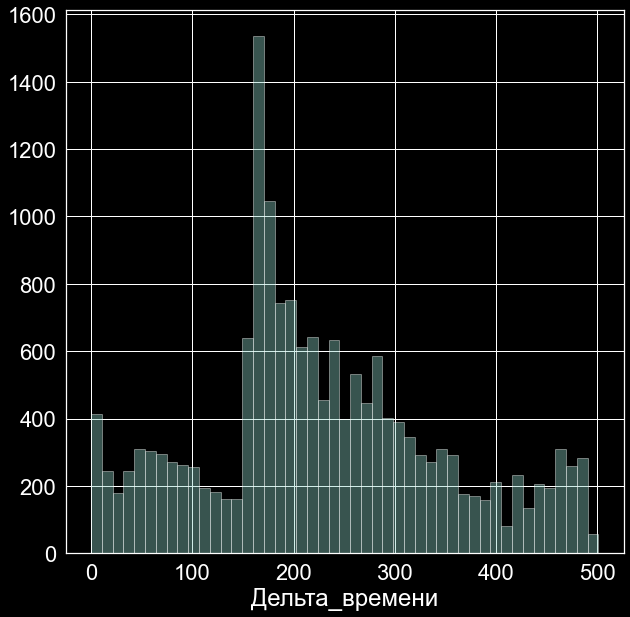

In [72]:
sns.distplot(df_filter['Дельта_времени'], kde=False)

Большинство пользователей предпочитают долгосрочные стратегии с вложением средств на срок больше чем на 6 месяцев (Больше 60%)  
Резкий скачок на 180 дней говорит о том, что многие клиенты предпочитают вкладываться в стратегию на пол года.   
Отсутствующие данные в дате окончания (72%) говорят о том, что клиенты не прекратили пользоваться услугой на 2021-02-16.

Представим данные по временным группам пользования услугой на рассчитанную дату max_date и рассчитаем количество пользователей в каждой группе

In [106]:
def group(x):
    if 0 <= x <= 150:
        return 'До 5 мес'
    if 150 < x <= 300:
        return 'От 5 до 10 мес'
    else: return '> 10 мес'

In [107]:
df_filter['Временная группа'] = df_filter['Дельта_времени'].apply(group)

In [108]:
time_groups = df_filter.groupby('Временная группа', as_index = False).agg({'Клиент':'nunique'})\
                                                        .rename(columns={'Клиент':'Количество пользователей'})

In [109]:
time_groups['Процент'] = round(time_groups['Количество пользователей'] / time_groups['Количество пользователей'].sum() * 100, 2)

In [110]:
time_groups

,Временная группа,Количество пользователей,Процент
0,> 10 мес,3424,27.97
1,До 5 мес,2299,18.78
2,От 5 до 10 мес,6517,53.24


Большинство пользователей предпочитают пользоваться стратегиями сроком больше 6 мес, при этом учитываем что большинство пользователей не прекратили пользоваться услугой.

Посчитаем количество пользователей в разрезе услуг, а также на какое время в среднем пользуются услугой.   
Итоговый датафрейм отсортируем по наименьшему среднему времени и количеству пользователей.

In [78]:
strategies = df_filter.groupby('Услуга', as_index=False)['Дельта_времени'].agg(['mean', 'median'])\
                                                            .sort_values('median')\
                                                            .rename(columns={'mean':'Среднее_к-во_дней', 'median':'Медианное_к-во дней'})\
                                                            .reset_index()

In [79]:
strategies.head()

,Услуга,Среднее_к-во_дней,Медианное_к-во дней
0,Strategy_27,0.0,0.0
1,Strategy_57,0.0,0.0
2,Strategy_14,0.0,0.0
3,Strategy_205,0.0,0.0
4,Strategy_63,0.0,0.0


В данных присутствуют услуги, в среднем которыми не пользовались и одного дня

In [80]:
strategies[strategies['Медианное_к-во дней'] == 0]

,Услуга,Среднее_к-во_дней,Медианное_к-во дней
0,Strategy_27,0.0,0.0
1,Strategy_57,0.0,0.0
2,Strategy_14,0.0,0.0
3,Strategy_205,0.0,0.0
4,Strategy_63,0.0,0.0
5,Strategy_288,0.0,0.0
6,Strategy_121,0.0,0.0
7,Strategy_344,50.5,0.0
8,Strategy_313,0.0,0.0


Рассчитаем сколько клиентов воспользовались услугой

In [81]:
strategies_users = df_filter.groupby('Услуга', as_index=False)['Клиент'].agg(['nunique'])\
                                                            .sort_values('nunique')\
                                                            .rename(columns={'nunique':'К-во_клиентов'})\
                                                            .reset_index()

In [82]:
strategies_users.head()

,Услуга,К-во_клиентов
0,Strategy_27,1
1,Strategy_306,1
2,Strategy_308,1
3,Strategy_178,1
4,Strategy_313,1


In [83]:
strategies_final = strategies.merge(strategies_users, on='Услуга') # Соединим датафрейм

In [84]:
strategies_final.head(10)

,Услуга,Среднее_к-во_дней,Медианное_к-во дней,К-во_клиентов
0,Strategy_27,0.0,0.0,1
1,Strategy_57,0.0,0.0,1
2,Strategy_14,0.0,0.0,2
3,Strategy_205,0.0,0.0,1
4,Strategy_63,0.0,0.0,1
5,Strategy_288,0.0,0.0,1
6,Strategy_121,0.0,0.0,1
7,Strategy_344,50.5,0.0,3
8,Strategy_313,0.0,0.0,1
9,Strategy_165,0.5,0.5,2


Присоединим последнюю дату входа в стратегию

In [85]:
strategies_final = strategies_final.merge(df_filter[['Услуга','Дата_начала']]\
                                                    .groupby('Услуга', as_index=False)\
                                                    .agg({'Дата_начала':'max'}), on = 'Услуга')

In [86]:
strategies_final['Среднее_к-во_дней'] = np.round(strategies_final['Среднее_к-во_дней'],1)

In [87]:
strategies_final['Дата_начала'].sort_values(ascending=False)

165    2020-12-14
56     2020-12-14
230    2020-12-14
231    2020-12-14
234    2020-12-14
          ...    
281    2020-01-24
327    2020-01-21
328    2020-01-21
329    2020-01-14
330    2020-01-13
Name: Дата_начала, Length: 331, dtype: object

Отобразим на графике распределение среднего количества дней

C:\Users\alyap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Среднее_к-во_дней'>

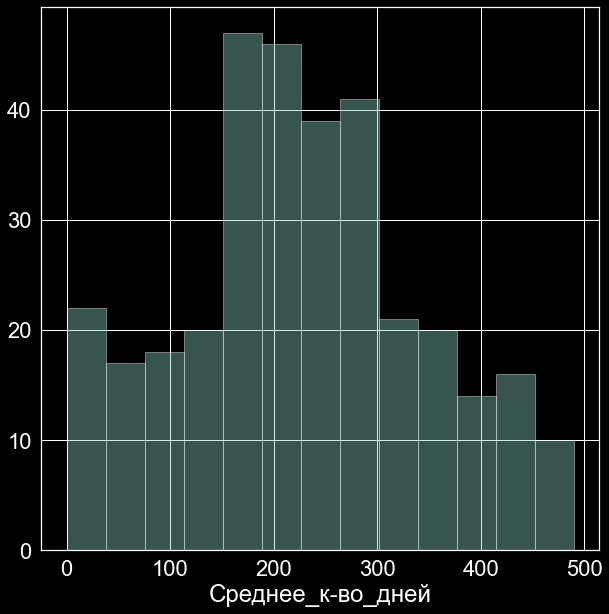

In [88]:
sns.distplot(strategies_final['Среднее_к-во_дней'], kde=False)

<AxesSubplot:xlabel='Медианное_к-во дней'>

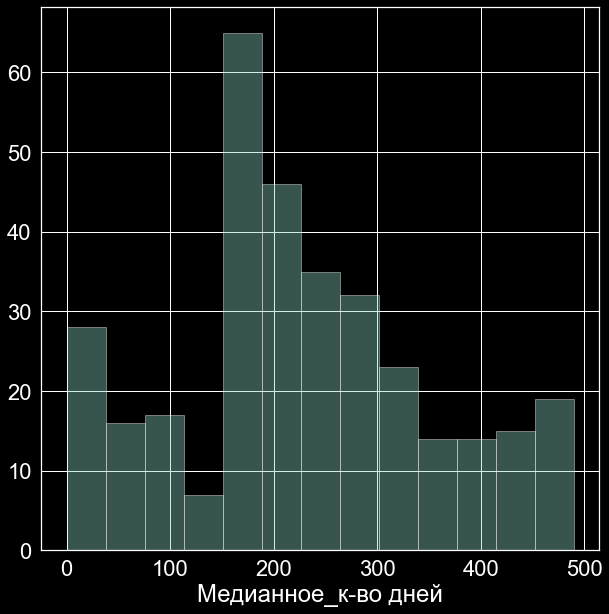

In [89]:
sns.distplot(strategies_final['Медианное_к-во дней'], kde=False)

Среднее и медиана практически сходятся.   
Отобразим на графике распределение к-во клиентов меньше 20

<AxesSubplot:xlabel='К-во_клиентов'>

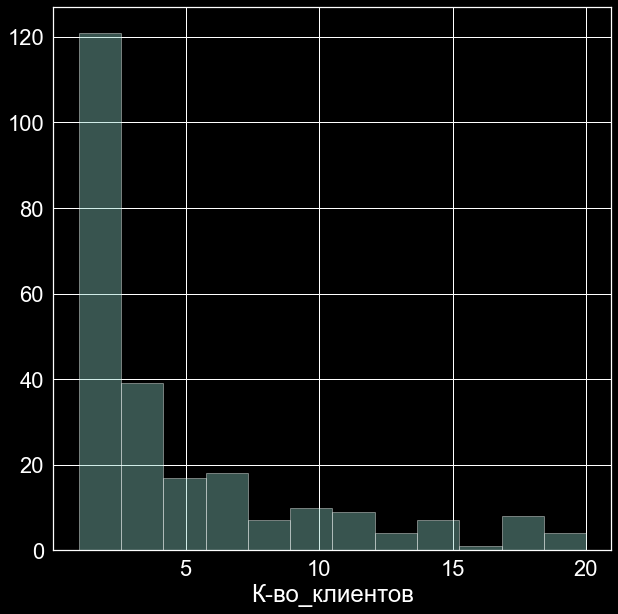

In [90]:
sns.distplot(strategies_final[strategies_final['К-во_клиентов'] <= 20]['К-во_клиентов'], kde=False)

Нас интересуют те стратегии, в которые зашли до 5 клиентов

In [91]:
strategies_final['К-во_клиентов'].value_counts().head()

1    83
2    38
3    20
4    19
5    17
Name: К-во_клиентов, dtype: int64

Поставим фильтр на медианное к-во дней < 30 либо количества клиентов меньше 5 и направим данную таблицу в отдел маркетинга для проработки решений по данным стратегиям.

In [92]:
strategies_final_ = strategies_final[(strategies_final['К-во_клиентов'] <= 2) | (strategies_final['Медианное_к-во дней'] <= 30)]
strategies_final_.sort_values('К-во_клиентов', ascending=False).head(10)

,Услуга,Среднее_к-во_дней,Медианное_к-во дней,К-во_клиентов,Дата_начала
25,Strategy_75,40.6,21.0,15,2020-12-10
13,Strategy_341,103.7,2.0,5,2020-12-14
20,Strategy_86,86.0,13.5,4,2020-12-11
26,Strategy_102,48.4,23.0,4,2020-12-14
7,Strategy_344,50.5,0.0,3,2020-12-14
23,Strategy_73,17.0,17.0,3,2020-12-10
93,Strategy_89,169.5,169.5,2,2020-12-07
52,Strategy_74,92.5,92.5,2,2020-10-08
80,Strategy_310,162.5,162.5,2,2020-12-09
246,Strategy_194,302.0,302.0,2,2020-11-17


In [93]:
strategies_final_.sort_values('Медианное_к-во дней').head(10)

,Услуга,Среднее_к-во_дней,Медианное_к-во дней,К-во_клиентов,Дата_начала
0,Strategy_27,0.0,0.0,1,2020-05-04
1,Strategy_57,0.0,0.0,1,2020-05-04
2,Strategy_14,0.0,0.0,2,2020-12-11
3,Strategy_205,0.0,0.0,1,2020-12-08
4,Strategy_63,0.0,0.0,1,2020-12-07
5,Strategy_288,0.0,0.0,1,2020-12-08
6,Strategy_121,0.0,0.0,1,2020-12-14
7,Strategy_344,50.5,0.0,3,2020-12-14
8,Strategy_313,0.0,0.0,1,2020-12-08
9,Strategy_165,0.5,0.5,2,2020-12-14


Вывод:    
Достаточно большое к-во стратегий, которыми клиенты не пользуются:   
 * 121 стратегия, в которые зашли только 1-2 клиента,
 * существуют стратегии, которыми пользуются меньше месяца,
 * существуют стратегии, срок захода в которых составляет менее одного дня 

Проанализируем возраст пользователей   
Возраст будем считать от даты max_date, т.к. мы приняли эту дату за дату выгрузки

In [95]:
df['Возраст'] = df['Дата рождения'].apply(
               lambda x: max_date.year - x.year - 
               ((max_date.month, max_date.day) < (x.month, x.day)) 
               )

In [96]:
df['Возраст'].sort_values() # Отсортируем по возрастанию

11306     6
2459     29
11833    29
11832    29
11831    29
         ..
7129     40
7130     40
1578     40
13432    40
10960    40
Name: Возраст, Length: 17270, dtype: int64

Заметим аномалию - пользователь с возрастом 6 лет, направим данную информацию в юридическую службу для проверки документов   
Всем остальным клиентам от 29 до 40 лет

In [97]:
df.loc[11306,]

Клиент                             User_6066
Дата рождения            2015-04-07 00:00:00
Брокерский счет          Broker_account_7044
Услуга                           Strategy_59
Начало              2020-08-07T16:48:07.000Z
Окончание                               None
Начало_new         2020-08-07 16:48:07+00:00
Окончание_new                            NaT
Дата_начала              2020-08-07 00:00:00
Дата_окончания                           NaT
Дельта_времени                           NaT
Возраст                                    6
Name: 11306, dtype: object

In [98]:
user_min_age = df.query('Клиент == "User_6066"').to_csv('C:/Users/alyap/Finam/user_min_age.csv', index=False)

Проанализируем пользователей по наличию количества брокерских счетов

In [99]:
df.groupby('Клиент', as_index=False).agg({'Брокерский счет':'nunique'}).sort_values('Брокерский счет', ascending=False)

,Клиент,Брокерский счет
242,User_10219,22
8426,User_766,20
7866,User_6831,18
5944,User_4765,18
7460,User_6293,18
...,...,...
3748,User_2481,1
3747,User_2480,1
3746,User_248,1
3745,User_2479,1


Клиент может открыть сколько угодно брокерских счетов, однако совместные брокерские счета в России запрещены.   
Рассмотрим имеются ли совместные счета в датафрейме.

In [111]:
df.groupby('Брокерский счет', as_index=False).agg({'Клиент':'nunique'}).sort_values('Брокерский счет', ascending=False)

,Брокерский счет,Клиент
16455,Broker_account_9999,1
16454,Broker_account_9996,1
16453,Broker_account_9994,1
16452,Broker_account_9993,1
16451,Broker_account_9992,1
...,...,...
4,Broker_account_1000,1
3,Broker_account_100,1
2,Broker_account_10,1
1,Broker_account_1,1


Совместные счета отсутстсвуют.   
Рассмотрим теперь на скольких счетах клиент подключил одну и ту же стратегию.

In [100]:
the_usual_suspects = df.groupby(['Клиент', 'Услуга'], as_index=False).agg({'Брокерский счет':'nunique'})\
                                                .sort_values('Брокерский счет', ascending=False)\
                                                .rename(columns={'Брокерский счет':'Количество_счетов'})
the_usual_suspects

,Клиент,Услуга,Количество_счетов
611,User_10219,Strategy_254,22
610,User_10218,Strategy_254,12
14252,User_8944,Strategy_211,8
11344,User_6205,Strategy_234,7
3129,User_13407,Strategy_362,5
...,...,...,...
5692,User_258,Strategy_17,1
5693,User_2580,Strategy_19,1
5694,User_2582,Strategy_16,1
5695,User_2582,Strategy_212,1


Заметим, что 2 зарегистрированные подряд пользователя User_10218 и User_10219 воспользовались услугой Strategy_254 суммарно c 34х брокерских счетов.   
Считаем данную информацию подозрительной, направим данные в службу безопасности для проверки пользователей.

In [101]:
the_usual_suspects = df.query('(Клиент == "User_10218") or (Клиент == "User_10219")')
the_usual_suspects.to_csv('C:/Users/alyap/Finam/the_usual_suspects.csv', index=False)

In [102]:
the_usual_suspects.head()

,Клиент,Дата рождения,Брокерский счет,Услуга,Начало,Окончание,Начало_new,Окончание_new,Дата_начала,Дата_окончания,Дельта_времени,Возраст
622,User_10218,1983-05-01,Broker_account_14697,Strategy_236,2020-11-24T19:51:58.000Z,2021-01-25T16:03:36.000Z,2020-11-24 19:51:58+00:00,2021-01-25 16:03:36+00:00,2020-11-24,2021-01-25,62 days,38
623,User_10218,1983-05-01,Broker_account_14698,Strategy_254,2020-12-07T21:26:50.000Z,2021-01-25T16:05:49.000Z,2020-12-07 21:26:50+00:00,2021-01-25 16:05:49+00:00,2020-12-07,2021-01-25,49 days,38
624,User_10218,1983-05-01,Broker_account_14699,Strategy_254,2020-10-26T10:32:06.000Z,2021-01-25T16:04:14.000Z,2020-10-26 10:32:06+00:00,2021-01-25 16:04:14+00:00,2020-10-26,2021-01-25,91 days,38
625,User_10218,1983-05-01,Broker_account_14700,Strategy_254,2020-10-26T10:32:55.000Z,2021-01-25T16:07:01.000Z,2020-10-26 10:32:55+00:00,2021-01-25 16:07:01+00:00,2020-10-26,2021-01-25,91 days,38
626,User_10218,1983-05-01,Broker_account_14701,Strategy_254,2020-11-01T17:43:56.000Z,2021-01-25T16:07:56.000Z,2020-11-01 17:43:56+00:00,2021-01-25 16:07:56+00:00,2020-11-01,2021-01-25,85 days,38


***
## Выводы:

**1. Информация для разработчика продукта:**
 * существуют услуги, срок захода в которых составляет менее одного дня.   
 Их подключили 1-2 пользователя и вышли в тот же день.   
 Это означает что данные услуги не привлекательны для клиента и разработчику необходимо принять решение либ о пересмотре условий либо об аннулировании таких услуг.   
 
**2. Информация для отдела маркетинга:**
 * Достаточно большое к-во услуг, которыми пользователи не пользуются:
 * 121 услуга, в которые зашли только 1-2 клиента,
 * есть услуги, в которые клиент заходит на небольшой срок (меньше месяца).    
 Направим сводную таблицу со списком стратегий для принятия решения по их развитию.

**3. Информация для юридического отдела:**
 * Выявлен пользователь с возрастом 6 лет   
 Необходимо проверить документы пользователя
 
**4. Информация для отдела безопасности:**
 * Выявлено 2 зарегистрированных подряд пользователя User_10218 и User_10219, которые открыли суммарно 34 брокерских счета и воспользовались услугой Strategy_254.
Необходимо проверить деятельность данных пользователей на портале.
 
***